In [15]:
%run Get-data-examples.ipynb
%run ../GP-emulation.ipynb
%run ../Variable-selection.ipynb

In [2]:
import pandas as pd

def set_up(df):
    return df[list(set(my_inputs)-set(['id']))], pd.DataFrame(df["total"])

In [3]:
csv_table_metric = c3.SimulationModelParameters.fetch().objs.toJson()
dfparams = pd.DataFrame(csv_table_metric).iloc[:, 5:64]

In [4]:
print(dfparams.columns)

Index(['acure_bl_nuc', 'acure_ait_width', 'acure_cloud_ph',
       'acure_carb_ff_ems', 'acure_carb_ff_ems_eur', 'acure_carb_ff_ems_nam',
       'acure_carb_ff_ems_chi', 'acure_carb_ff_ems_asi',
       'acure_carb_ff_ems_mar', 'acure_carb_ff_ems_r', 'acure_carb_bb_ems',
       'acure_carb_bb_ems_sam', 'acure_carb_bb_ems_naf',
       'acure_carb_bb_ems_saf', 'acure_carb_bb_ems_bnh',
       'acure_carb_bb_ems_rnh', 'acure_carb_bb_ems_rsh', 'acure_carb_res_ems',
       'acure_carb_res_ems_chi', 'acure_carb_res_ems_asi',
       'acure_carb_res_ems_afr', 'acure_carb_res_ems_lat',
       'acure_carb_res_ems_r', 'acure_carb_ff_diam', 'acure_carb_bb_diam',
       'acure_carb_res_diam', 'acure_prim_so4_diam', 'acure_sea_spray',
       'acure_anth_so2', 'acure_anth_so2_chi', 'acure_anth_so2_asi',
       'acure_anth_so2_eur', 'acure_anth_so2_nam', 'acure_anth_so2_r',
       'acure_volc_so2', 'acure_bvoc_soa', 'acure_dms', 'acure_prim_moc',
       'acure_dry_dep_ait', 'acure_dry_dep_acc', 'acure_d

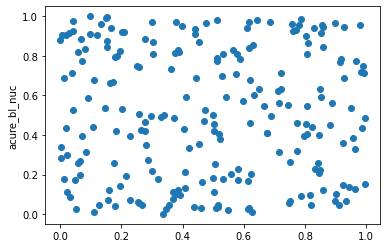

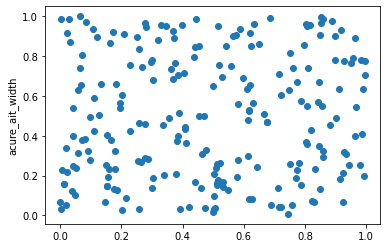

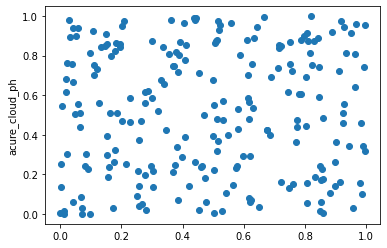

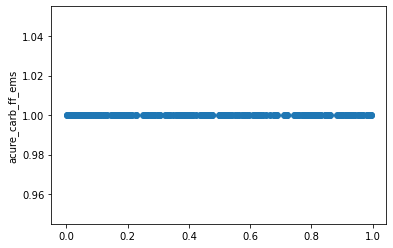

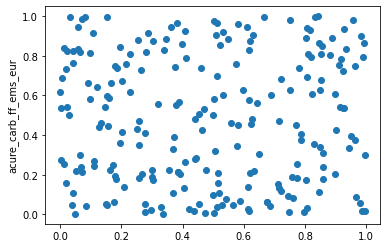

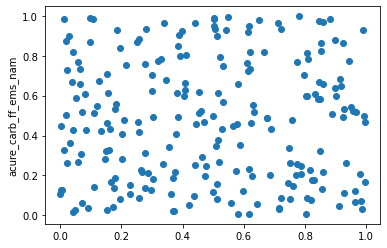

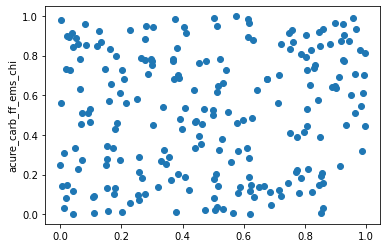

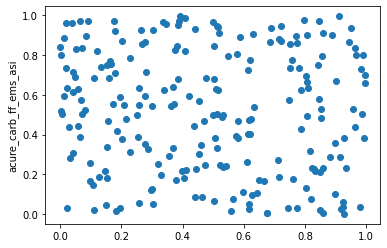

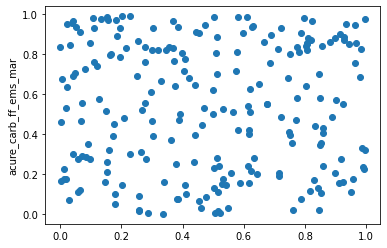

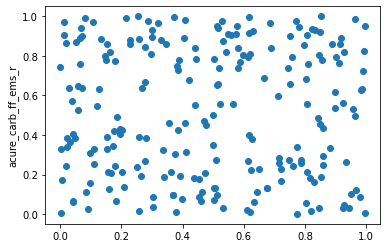

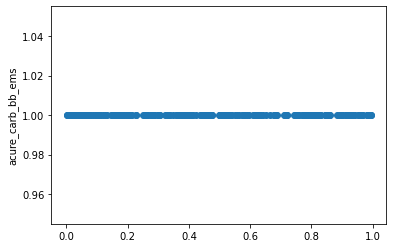

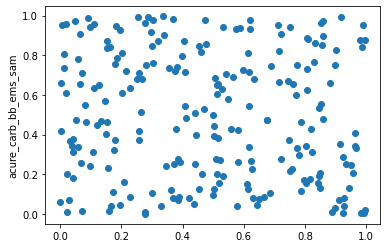

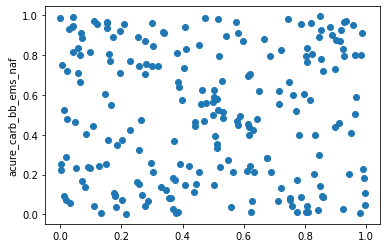

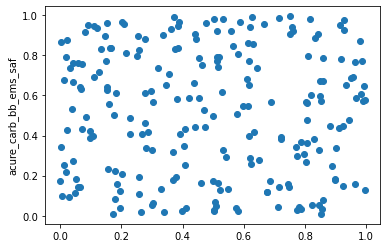

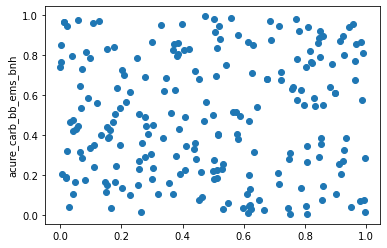

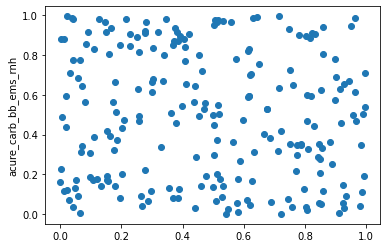

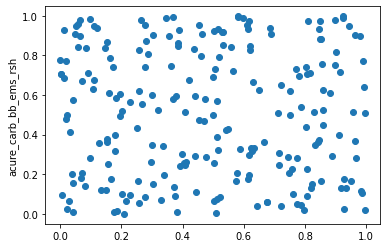

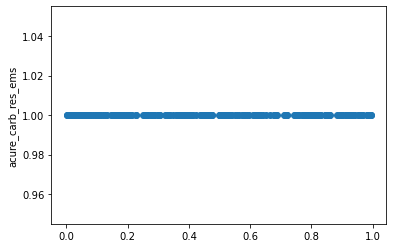

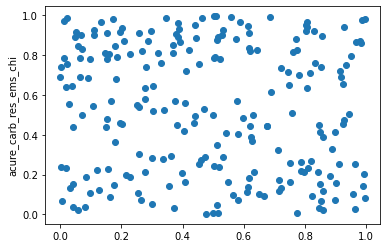

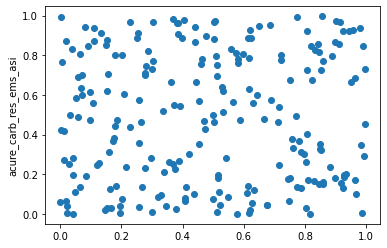

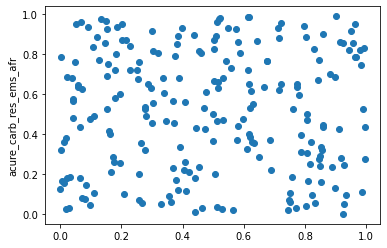

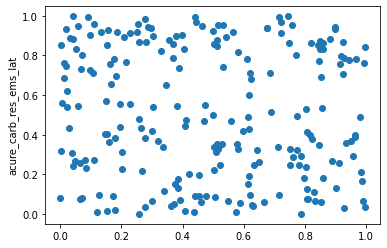

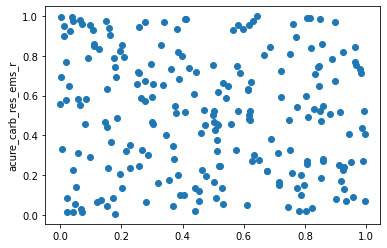

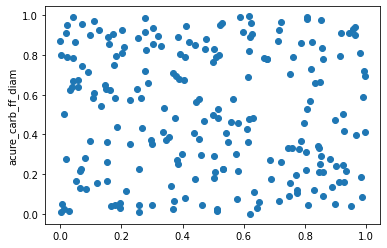

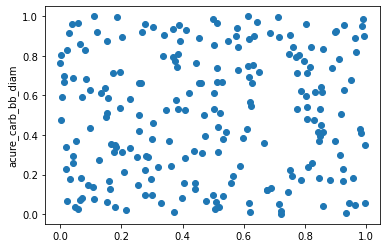

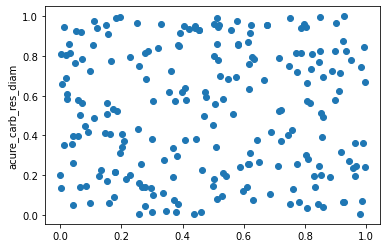

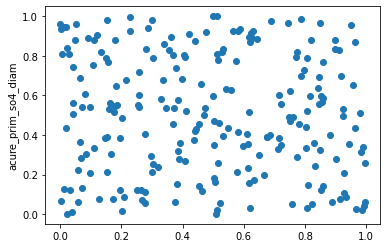

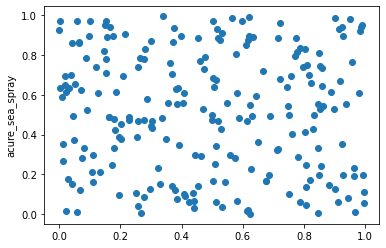

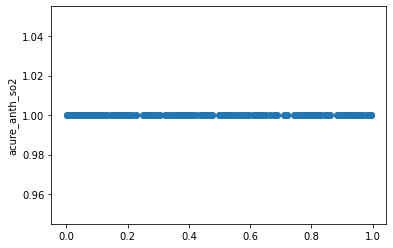

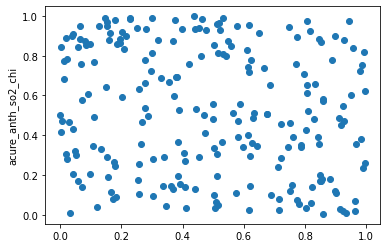

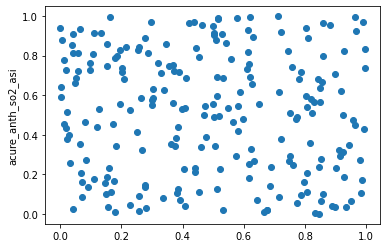

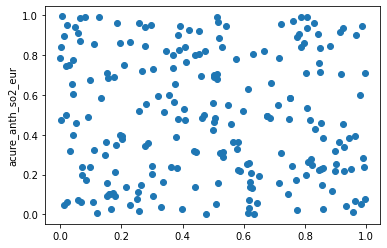

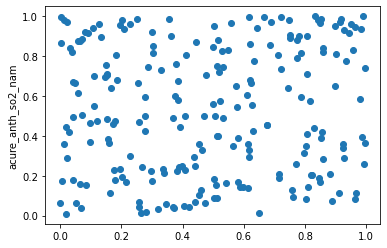

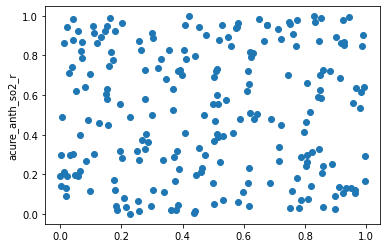

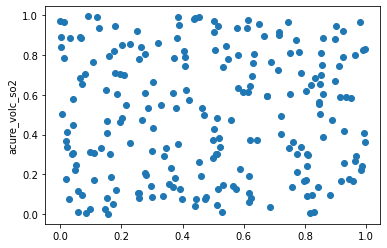

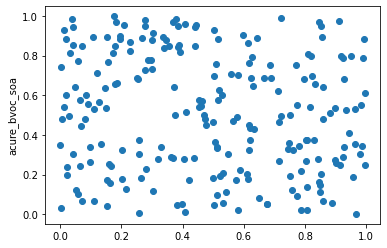

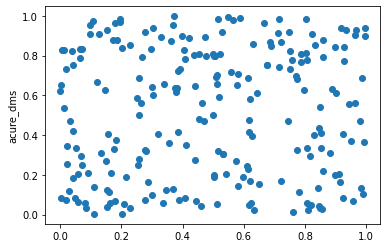

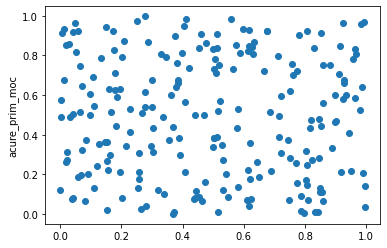

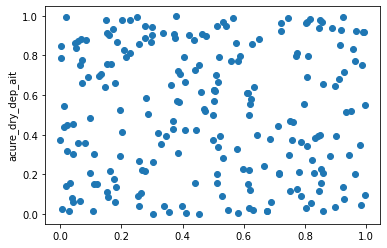

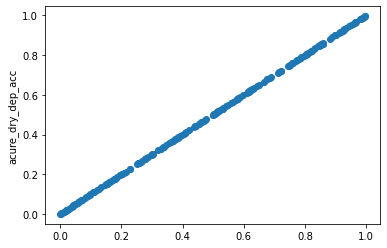

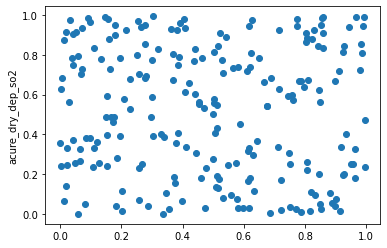

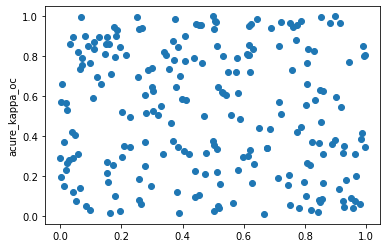

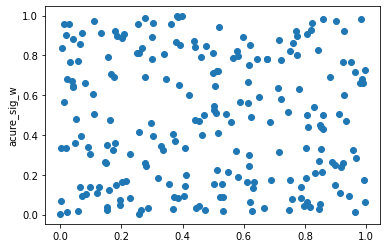

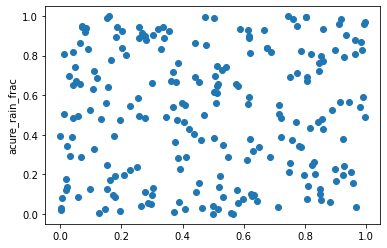

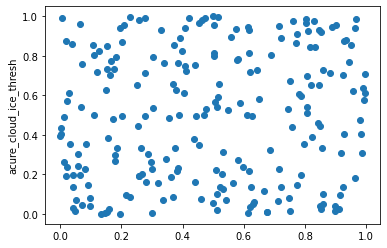

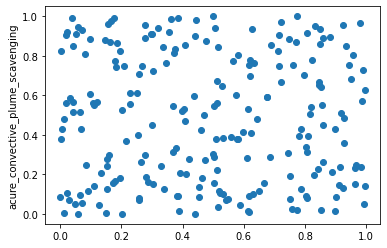

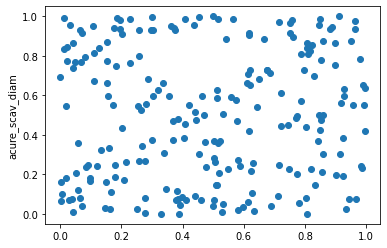

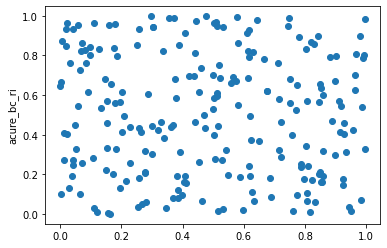

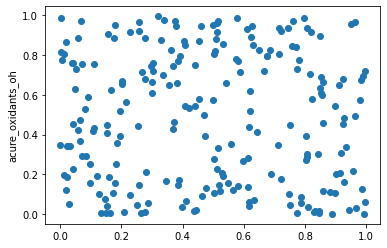

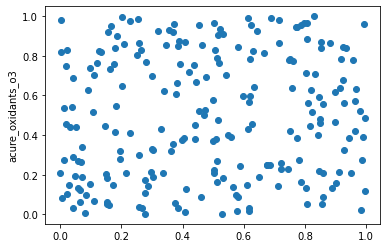

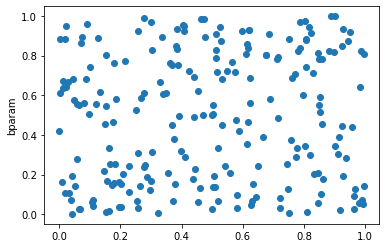

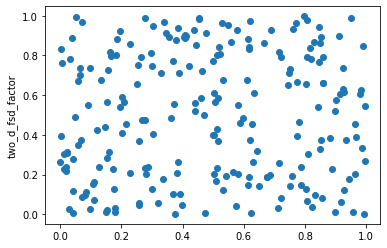

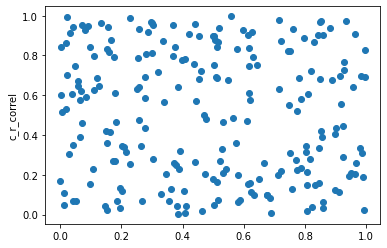

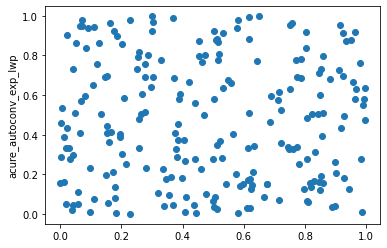

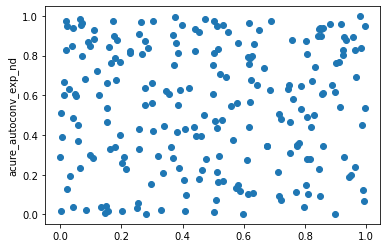

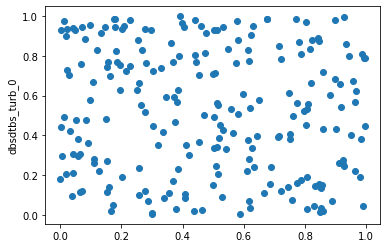

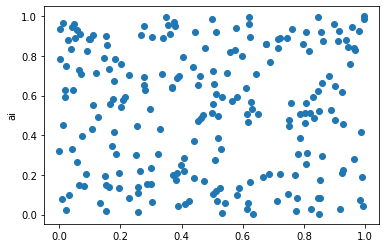

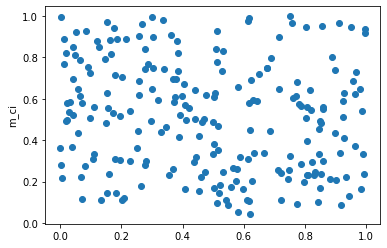

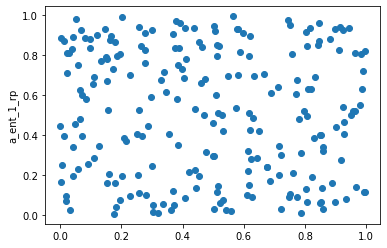

In [32]:
import matplotlib.pyplot as plt

for input_name in list(dfparams.columns):
    plt.scatter(dfparams['acure_dry_dep_acc'], dfparams[input_name])
    plt.ylabel(input_name)
    plt.show()

# Variable-selection : Example 1

## Set up

In [21]:
X, y = set_up(my_data)

my_model = train_GP_pipe(X, y)

KeyboardInterrupt: 

In [22]:
print(my_data)

                    id  acure_bl_nuc  acure_ait_width  acure_cloud_ph  \
0      EnsNo_1_SimNo_0      0.500000         0.650000        0.396000   
1      EnsNo_1_SimNo_1      0.470000         0.500000        0.500000   
2     EnsNo_1_SimNo_10      0.969888         0.083081        0.478474   
3    EnsNo_1_SimNo_100      0.132847         0.445265        0.390414   
4    EnsNo_1_SimNo_101      0.058261         0.630422        0.132292   
..                 ...           ...              ...             ...   
216   EnsNo_1_SimNo_95      0.591530         0.996801        0.170201   
217   EnsNo_1_SimNo_96      0.774235         0.165151        0.881014   
218   EnsNo_1_SimNo_97      0.227072         0.231834        0.185796   
219   EnsNo_1_SimNo_98      0.047377         0.633909        0.721278   
220   EnsNo_1_SimNo_99      0.912271         0.277201        0.814539   

     acure_prim_so4_diam  acure_sea_spray  acure_anth_so2_chi  \
0               1.000000         0.500000            0.557

## ARD

In [6]:
import numpy as np

inputs = list(set(my_inputs)-set(['id']))
output = "total"

ard_results = ard(my_model, inputs)

print(ard_results)

[('acure_sea_spray', 2.83519376e+01)
 ('acure_prim_so4_diam', 3.87781680e+01)
 ('acure_bvoc_soa', 4.18096896e+01) ('acure_dry_dep_acc', 4.58230135e+01)
 ('acure_kappa_oc', 8.82169512e+01) ('two_d_fsd_factor', 1.10687270e+02)
 ('acure_autoconv_exp_lwp', 1.14577760e+02) ('a_ent_1_rp', 1.27944283e+02)
 ('acure_dms', 1.36654890e+02) ('acure_bc_ri', 1.38451152e+02)
 ('acure_dry_dep_so2', 1.50752545e+02) ('m_ci', 1.74797231e+02)
 ('acure_volc_so2', 1.84202302e+02) ('c_r_correl', 1.95509674e+02)
 ('acure_autoconv_exp_nd', 2.05796942e+02)
 ('acure_anth_so2_r', 2.34744192e+02) ('ai', 2.82206051e+02)
 ('acure_convective_plume_scavenging', 3.05910338e+02)
 ('acure_anth_so2_asi', 3.23976705e+02)
 ('acure_dry_dep_ait', 4.47434035e+02) ('acure_scav_diam', 7.58580351e+03)
 ('acure_ait_width', 1.26310108e+04) ('acure_oxidants_o3', 1.51133733e+04)
 ('acure_sig_w', 1.62085290e+04) ('acure_prim_moc', 1.62848914e+04)
 ('acure_bl_nuc', 1.79420383e+04) ('acure_anth_so2_nam', 1.83569010e+04)
 ('acure_oxidant

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


## Selection

In [41]:
# cv(my_data, inputs, output="total", folds=2)

In [7]:
selection_results = select_vars(my_data, ard_results, "total", max_num_vars=20, folds=5)

print(selection_results)

    num_vars                           next_var      mean       std
0          1                    acure_sea_spray  0.014369  0.001214
1          2                acure_prim_so4_diam  0.011650  0.001799
2          3                     acure_bvoc_soa  0.010020  0.002085
3          4                  acure_dry_dep_acc  0.005647  0.000663
4          5                     acure_kappa_oc  0.003822  0.000670
5          6                   two_d_fsd_factor  0.003797  0.000756
6          7             acure_autoconv_exp_lwp  0.004394  0.001105
7          8                         a_ent_1_rp  0.003513  0.000391
8          9                          acure_dms  0.003780  0.001563
9         10                        acure_bc_ri  0.002932  0.000794
10        11                  acure_dry_dep_so2  0.002972  0.000429
11        12                               m_ci  0.002815  0.000720
12        13                     acure_volc_so2  0.003438  0.000911
13        14                         c_r_correl 

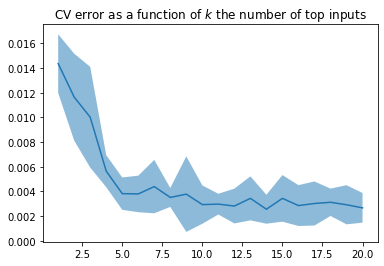

In [8]:
plot_cv_curve(selection_results)

## Distribution of parameter design

In [9]:
inputs_to_train = selection_results['next_var'][0:6]

inputs = get_inputs()

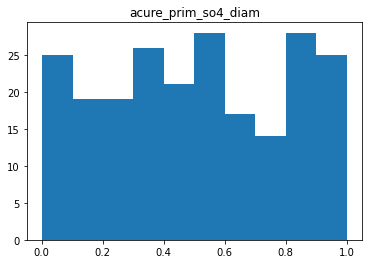

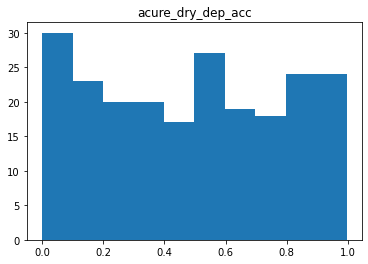

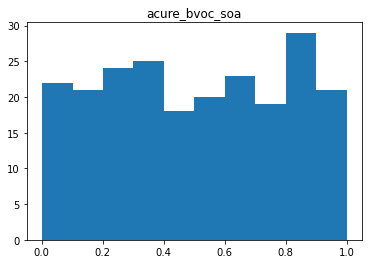

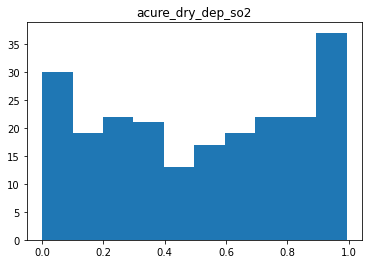

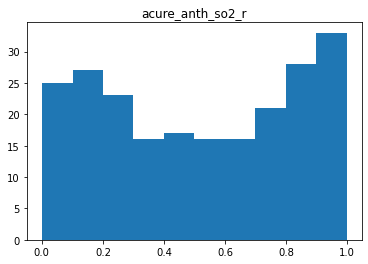

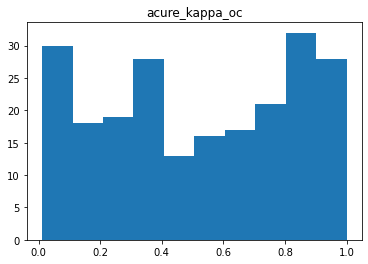

In [141]:
import matplotlib.pyplot as plt

for i in range(6):
    plt.hist(inputs[inputs_to_train[i]])
    _ = plt.title(inputs_to_train[i])
    plt.show()

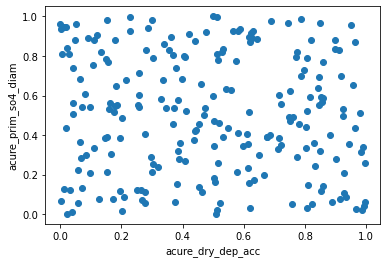

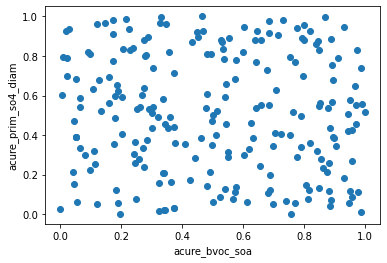

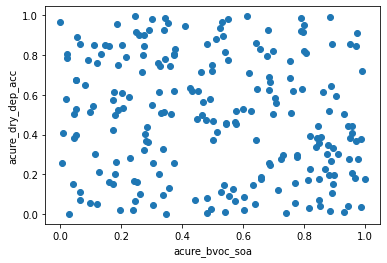

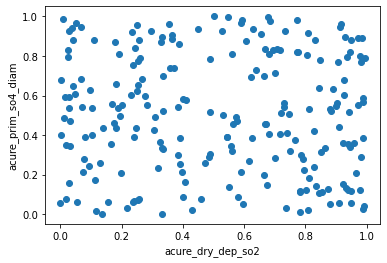

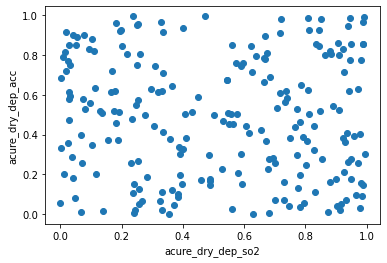

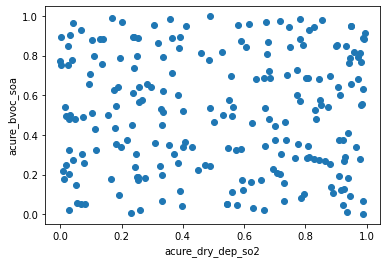

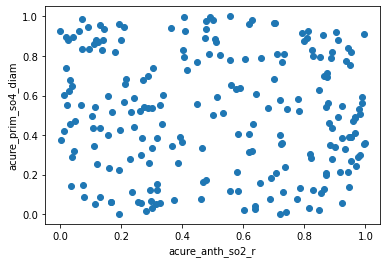

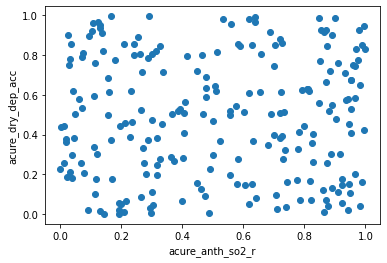

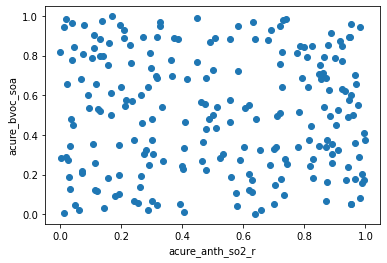

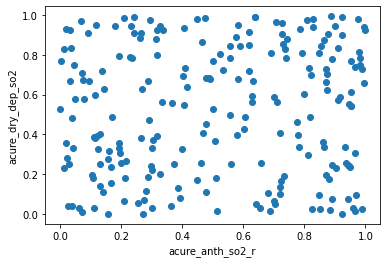

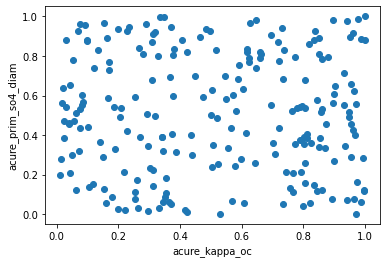

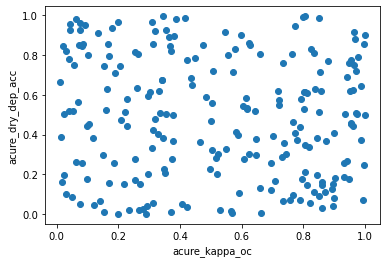

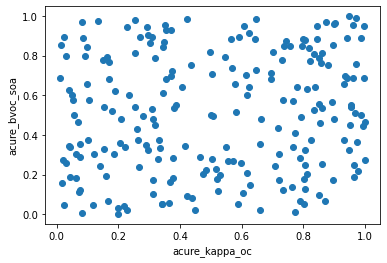

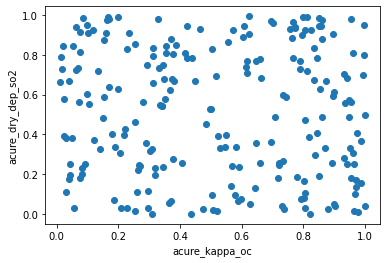

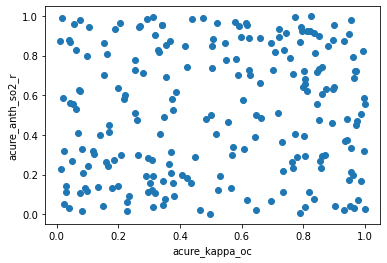

In [142]:
for i in range(6):
    for j in range(i):
        plt.scatter(inputs[inputs_to_train[i]], inputs[inputs_to_train[j]])
        
        plt.xlabel(inputs_to_train[i])
        plt.ylabel(inputs_to_train[j])
        
        plt.show()

## GP fit after selection

Selected inputs :  0        acure_sea_spray
1    acure_prim_so4_diam
2         acure_bvoc_soa
3      acure_dry_dep_acc
4         acure_kappa_oc
5       two_d_fsd_factor
Name: next_var, dtype: object


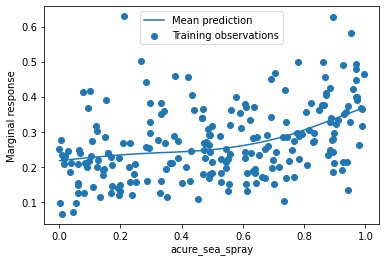

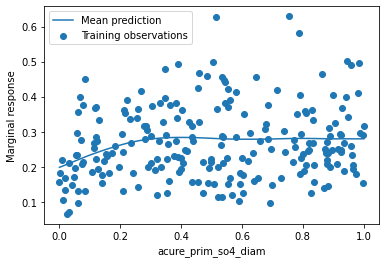

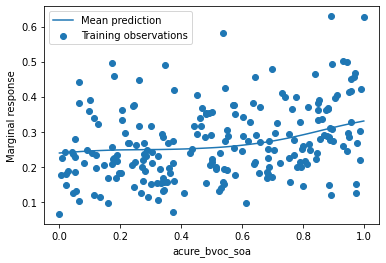

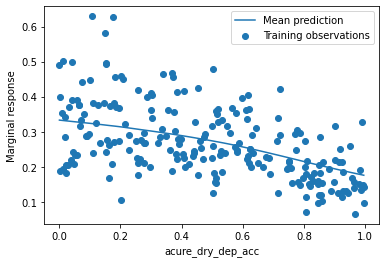

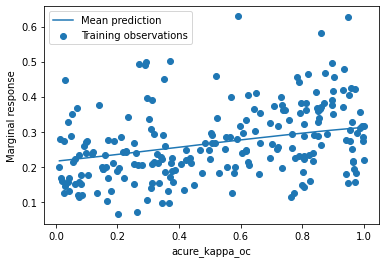

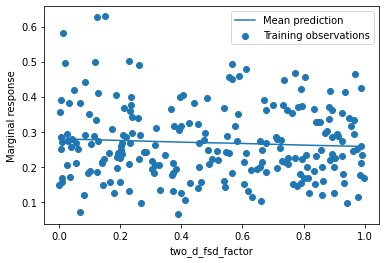

In [10]:
print('Selected inputs : ', inputs_to_train)

for input_to_view in inputs_to_train:
    X_test = make_test_data_for_viewing_GP(X, input_to_view, granularity=2)
    X_test_points, predictions, mean_predictions = view_GP_curve(X, y, inputs_to_train, input_to_view, 100)

# Variable-selection : Example 2

## Set-up

In [19]:
X2, y2 = set_up(my_data2)

my_model2 = train_GP_pipe(X2, y2)

In [20]:
print(my_data2)

                    id  acure_bl_nuc  acure_ait_width  acure_cloud_ph  \
0      EnsNo_1_SimNo_0      0.500000         0.650000        0.396000   
1      EnsNo_1_SimNo_1      0.470000         0.500000        0.500000   
2     EnsNo_1_SimNo_10      0.969888         0.083081        0.478474   
3    EnsNo_1_SimNo_100      0.132847         0.445265        0.390414   
4    EnsNo_1_SimNo_101      0.058261         0.630422        0.132292   
..                 ...           ...              ...             ...   
216   EnsNo_1_SimNo_95      0.591530         0.996801        0.170201   
217   EnsNo_1_SimNo_96      0.774235         0.165151        0.881014   
218   EnsNo_1_SimNo_97      0.227072         0.231834        0.185796   
219   EnsNo_1_SimNo_98      0.047377         0.633909        0.721278   
220   EnsNo_1_SimNo_99      0.912271         0.277201        0.814539   

     acure_prim_so4_diam  acure_sea_spray  acure_anth_so2_chi  \
0               1.000000         0.500000            0.557

## ARD

In [26]:
inputs = list(set(my_inputs)-set(['id']))
output = "total"

ard_results2 = ard(my_model2, inputs)

print(ard_results2)

[('acure_prim_so4_diam', 9.83389969e+00)
 ('acure_dry_dep_acc', 2.63596970e+01) ('acure_kappa_oc', 2.94788356e+01)
 ('m_ci', 3.42149069e+01) ('acure_bvoc_soa', 3.75432218e+01)
 ('acure_dry_dep_so2', 4.83202667e+01) ('a_ent_1_rp', 5.57060425e+01)
 ('acure_dms', 5.66301835e+01) ('acure_anth_so2_asi', 6.08200054e+01)
 ('acure_sig_w', 8.52647982e+01)
 ('acure_convective_plume_scavenging', 9.37697603e+01)
 ('acure_sea_spray', 9.40484397e+01) ('acure_volc_so2', 9.52756917e+01)
 ('dbsdtbs_turb_0', 9.64916959e+01)
 ('acure_autoconv_exp_lwp', 1.05452755e+02) ('ai', 1.27081343e+02)
 ('acure_oxidants_o3', 1.86381057e+02) ('acure_bc_ri', 1.87145863e+02)
 ('acure_ait_width', 2.13206859e+02) ('acure_dry_dep_ait', 2.65754231e+02)
 ('c_r_correl', 1.09679924e+03) ('acure_anth_so2_chi', 2.26319092e+03)
 ('acure_anth_so2_eur', 5.36325135e+03)
 ('acure_autoconv_exp_nd', 6.91172141e+03)
 ('acure_rain_frac', 7.82569330e+03) ('acure_anth_so2_r', 8.35319228e+03)
 ('bparam', 9.60216736e+03) ('acure_prim_moc', 

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


## Selection

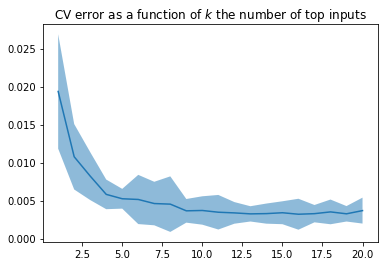

In [27]:
selection_results2 = select_vars(my_data2, ard_results2, "total", max_num_vars=20, folds=5)

plot_cv_curve(selection_results2)

## Distribution of parameter design

In [28]:
inputs_to_train2 = selection_results2['next_var'][0:6]

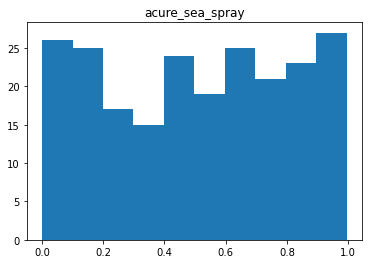

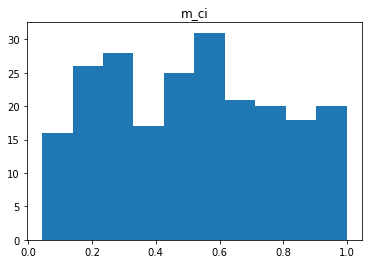

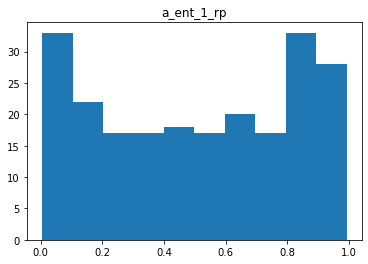

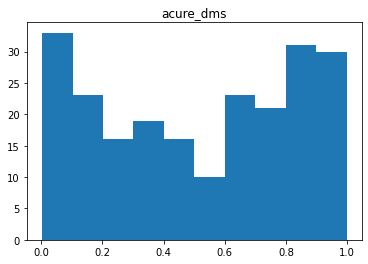

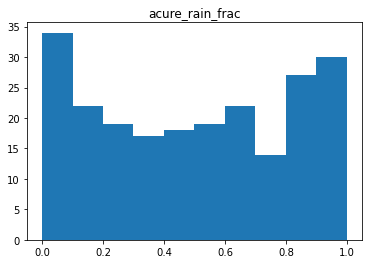

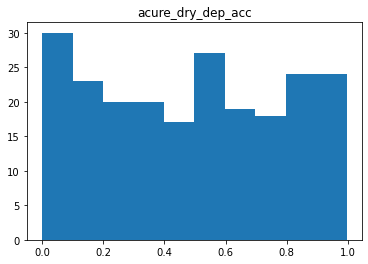

In [137]:
import matplotlib.pyplot as plt

for i in range(6):
    plt.hist(inputs[inputs_to_train2[i]])
    _ = plt.title(inputs_to_train2[i])
    plt.show()

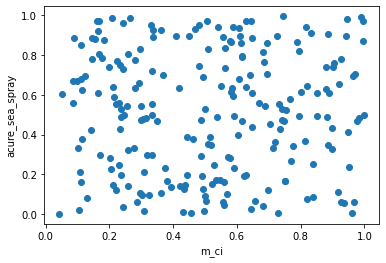

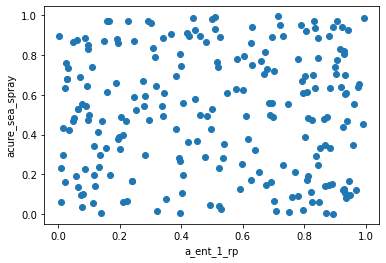

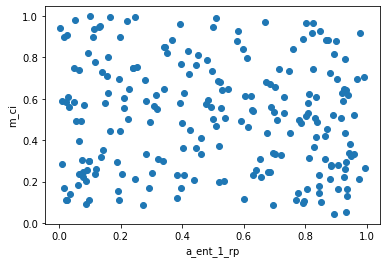

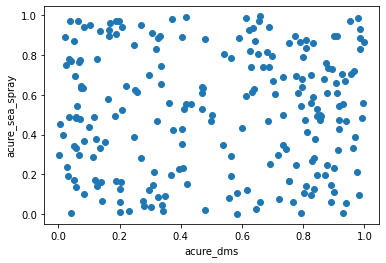

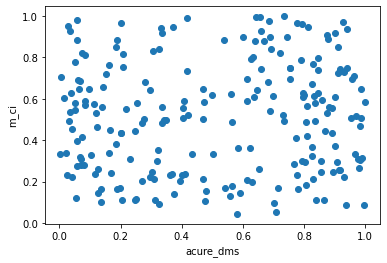

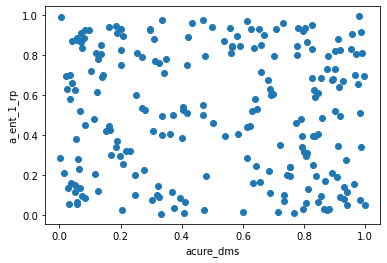

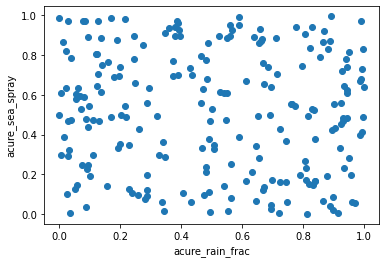

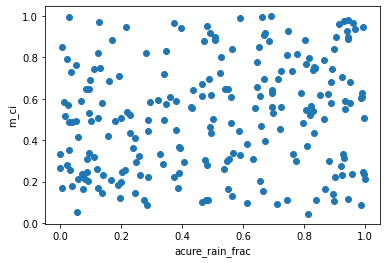

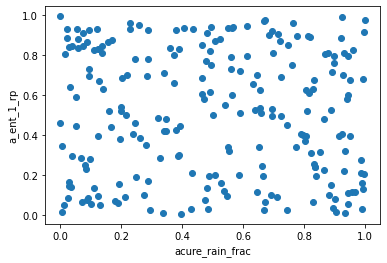

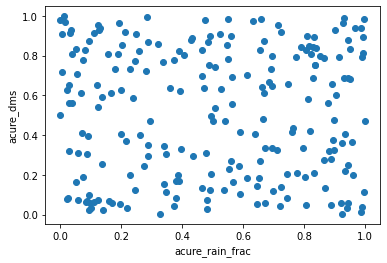

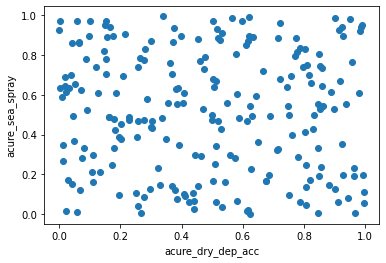

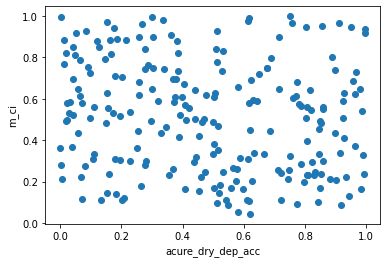

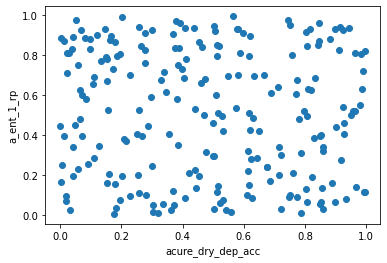

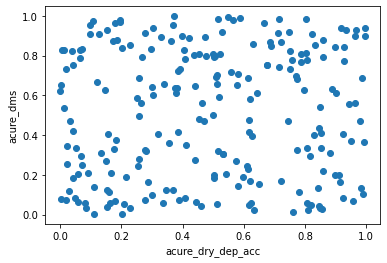

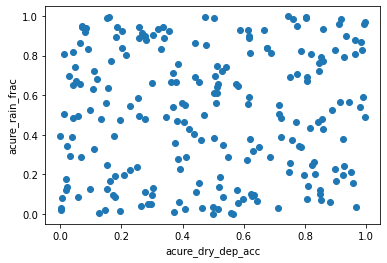

In [138]:
for i in range(6):
    for j in range(i):
        plt.scatter(inputs[inputs_to_train[i]], inputs[inputs_to_train[j]])
        
        plt.xlabel(inputs_to_train[i])
        plt.ylabel(inputs_to_train[j])
        
        plt.show()

## GP fit after selection

Selected inputs :  0    acure_prim_so4_diam
1      acure_dry_dep_acc
2         acure_kappa_oc
3                   m_ci
4         acure_bvoc_soa
5      acure_dry_dep_so2
Name: next_var, dtype: object


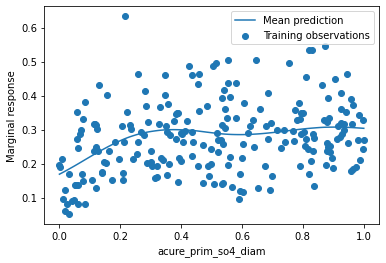

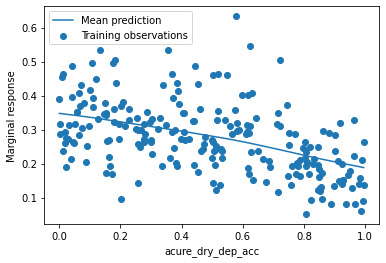

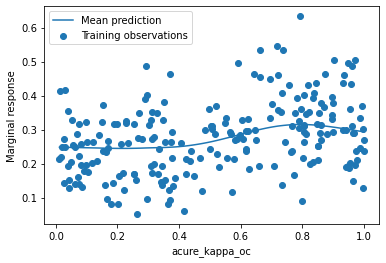

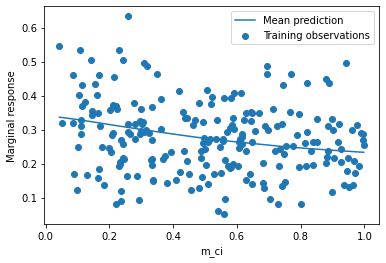

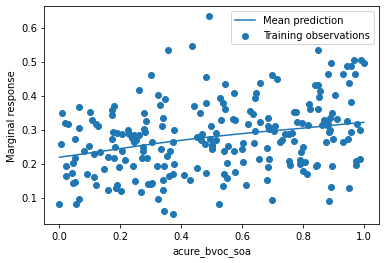

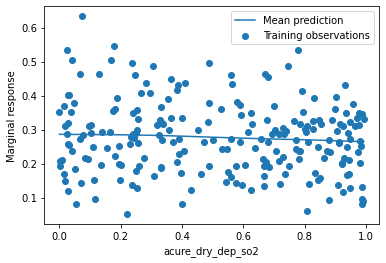

In [29]:
print('Selected inputs : ', inputs_to_train2)

for input_to_view in inputs_to_train2:
    X_test = make_test_data_for_viewing_GP(X2, input_to_view, granularity=2)
    X_test_points, predictions, mean_predictions = view_GP_curve(X2, y2, inputs_to_train2, input_to_view, 100)

# Variable-selection : Example 3

## Set-up

In [30]:
X3, y3 = set_up(my_data3)

my_model3 = train_GP_pipe(X3, y3)

## ARD

In [31]:
inputs = list(set(my_inputs)-set(['id']))
output = "total"

ard_results3 = ard(my_model3, inputs)

print(ard_results3)

[('acure_sea_spray', 2.90335034e+01) ('m_ci', 1.48008432e+02)
 ('acure_dry_dep_acc', 2.23678487e+02) ('acure_rain_frac', 2.42937586e+02)
 ('a_ent_1_rp', 4.18875530e+02) ('acure_volc_so2', 4.26093911e+02)
 ('acure_cloud_ice_thresh', 4.36961647e+02)
 ('dbsdtbs_turb_0', 4.96600745e+02) ('acure_dms', 5.77582005e+02)
 ('acure_prim_so4_diam', 5.78474239e+02)
 ('acure_autoconv_exp_lwp', 6.71561314e+02) ('c_r_correl', 7.37895693e+02)
 ('bparam', 1.30640173e+03) ('acure_dry_dep_so2', 1.66861529e+03)
 ('acure_convective_plume_scavenging', 3.49645132e+04)
 ('acure_prim_moc', 4.96355144e+04) ('ai', 5.29086199e+04)
 ('acure_kappa_oc', 5.42512642e+04) ('acure_dry_dep_ait', 8.03582466e+04)
 ('acure_cloud_ph', 8.36777614e+04) ('acure_anth_so2_nam', 9.18734719e+04)
 ('acure_bc_ri', 9.33276701e+04) ('acure_bvoc_soa', 9.62885679e+04)
 ('acure_ait_width', 1.00000000e+05)
 ('acure_anth_so2_asi', 1.00000000e+05)
 ('acure_anth_so2_chi', 1.00000000e+05)
 ('acure_anth_so2_eur', 1.00000000e+05)
 ('acure_anth_so

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


## Selection

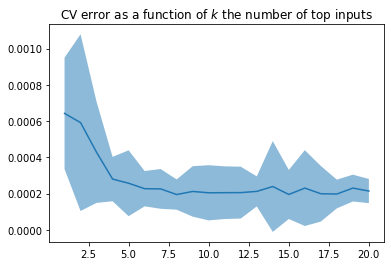

In [32]:
selection_results3 = select_vars(my_data3, ard_results3, "total", max_num_vars=20, folds=5)

plot_cv_curve(selection_results3)

## Distribution of parameter design

In [36]:
inputs_to_train3 = selection_results3['next_var'][0:4]

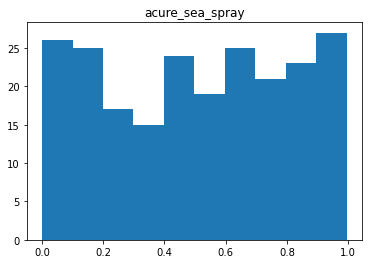

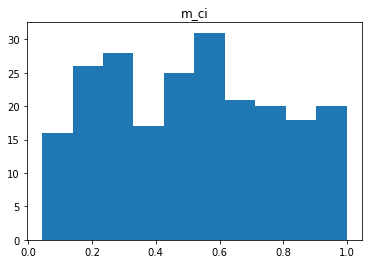

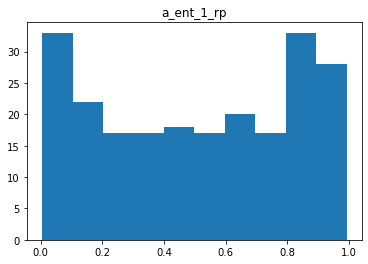

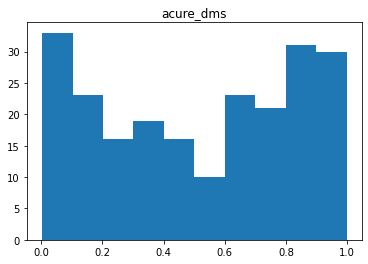

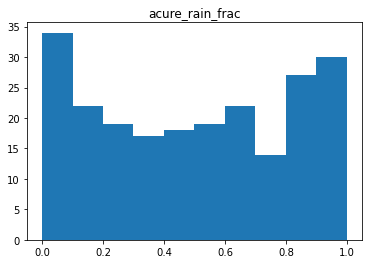

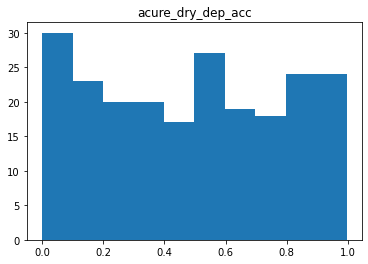

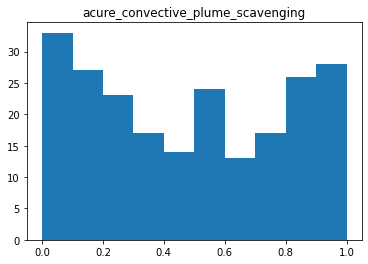

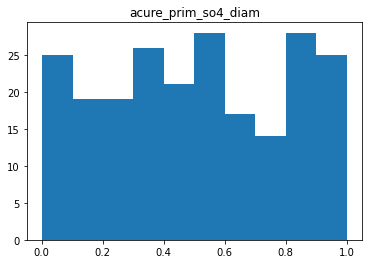

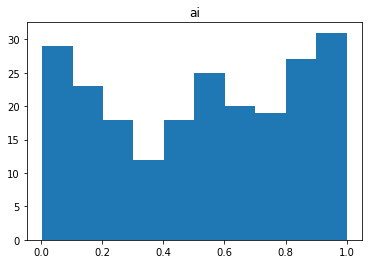

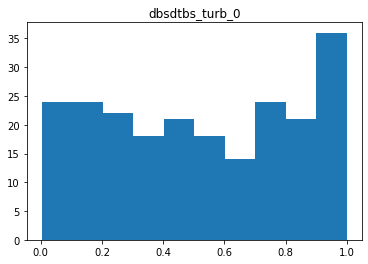

In [133]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.hist(inputs[inputs_to_train[i]])
    _ = plt.title(inputs_to_train[i])
    plt.show()

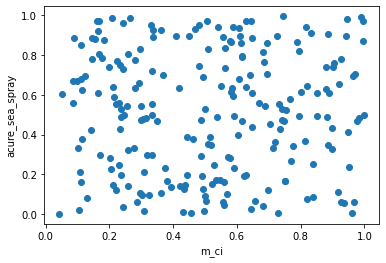

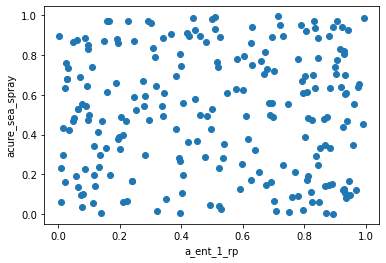

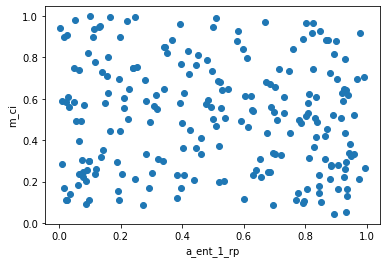

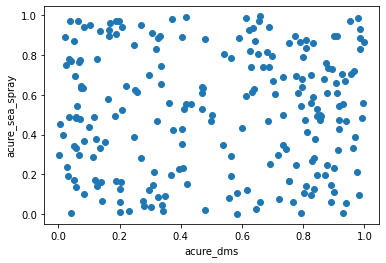

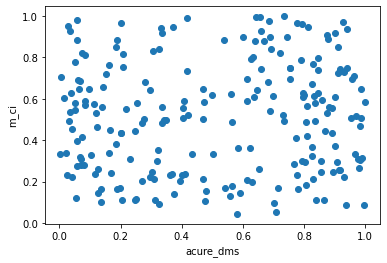

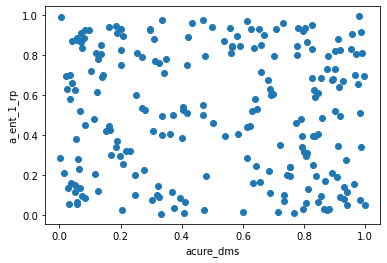

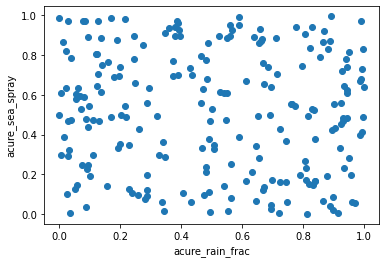

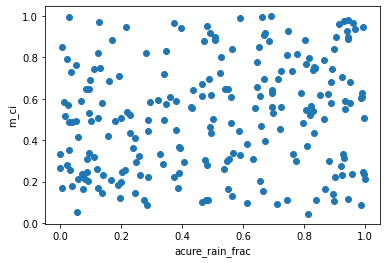

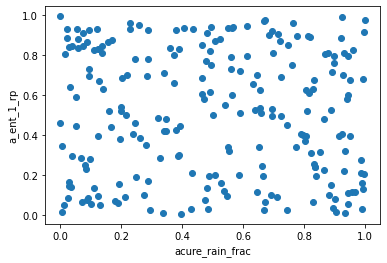

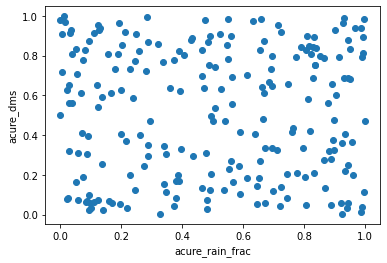

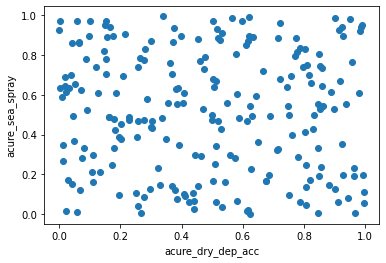

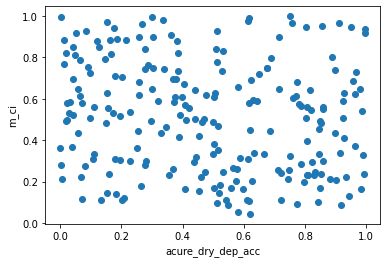

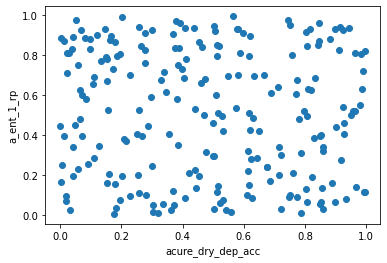

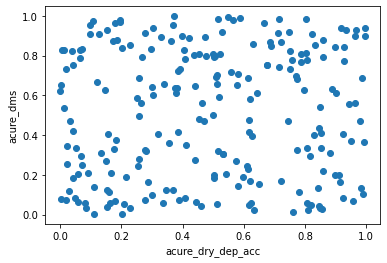

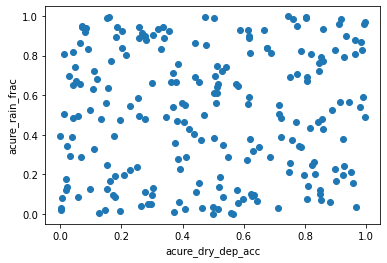

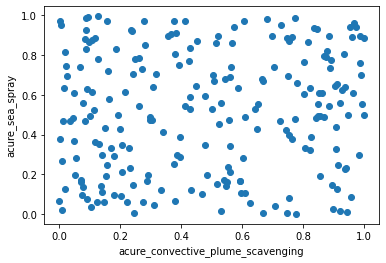

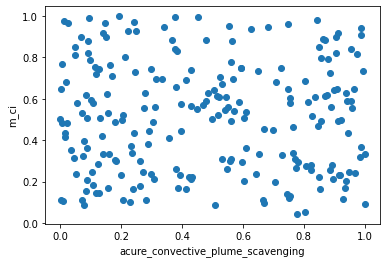

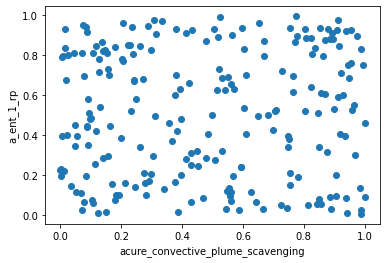

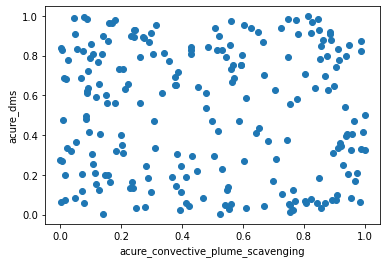

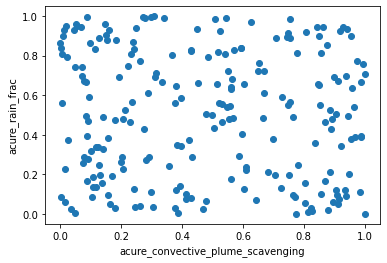

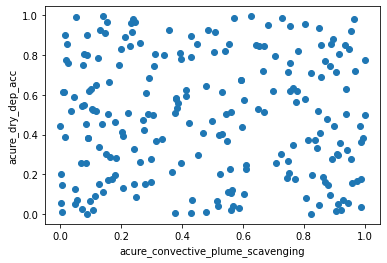

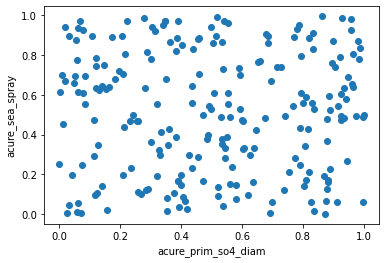

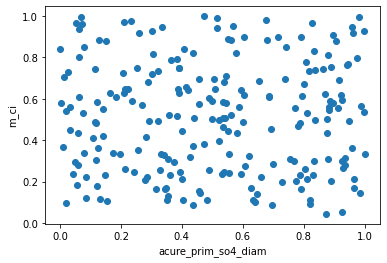

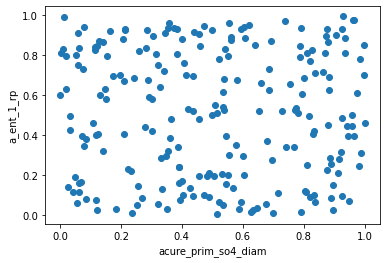

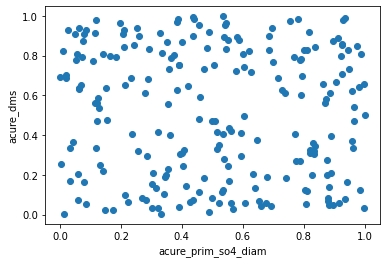

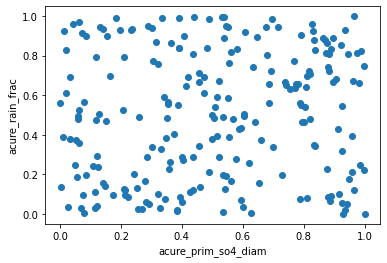

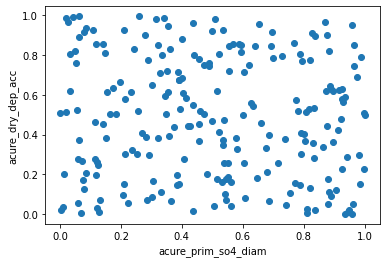

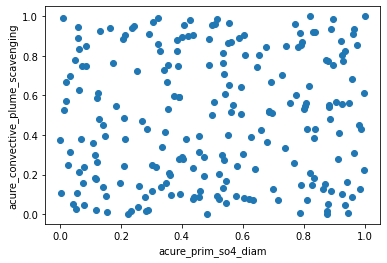

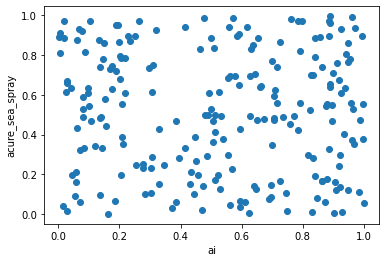

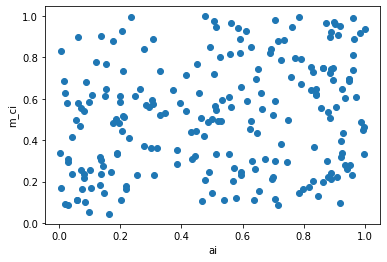

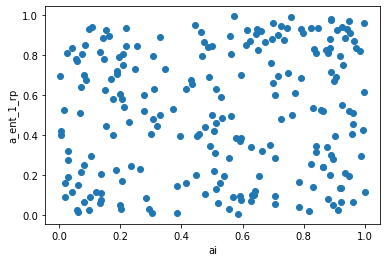

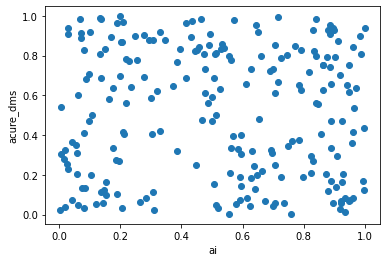

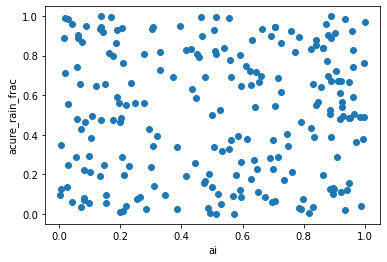

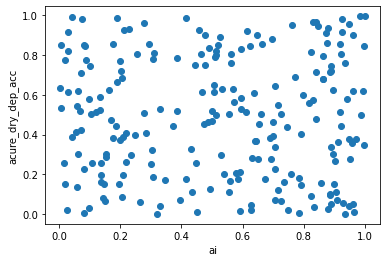

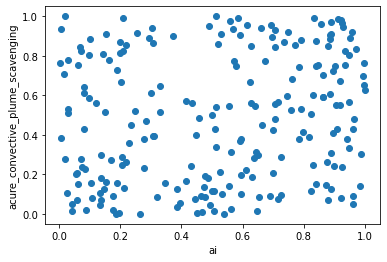

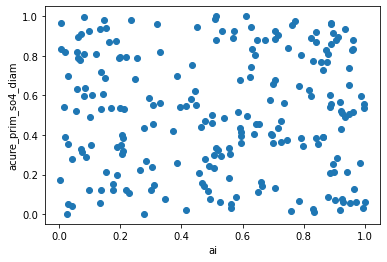

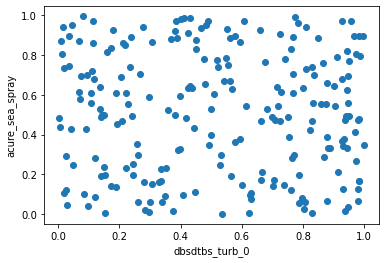

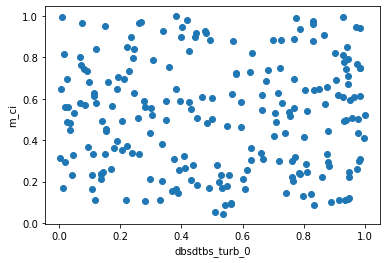

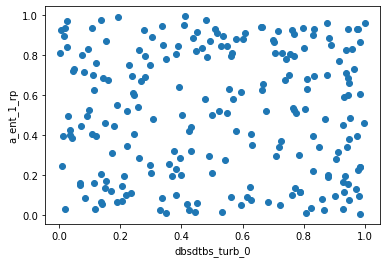

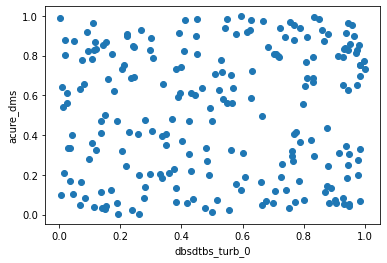

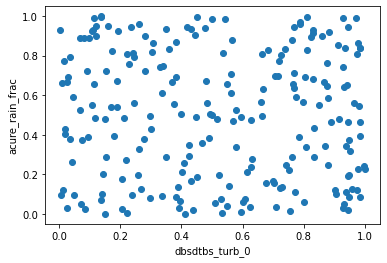

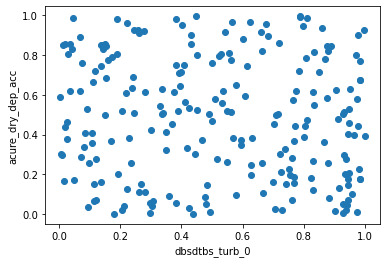

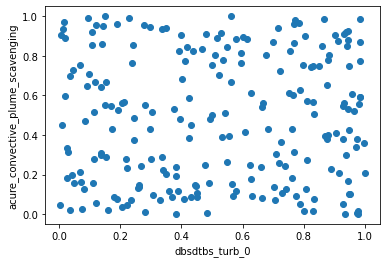

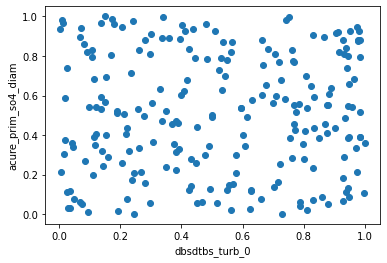

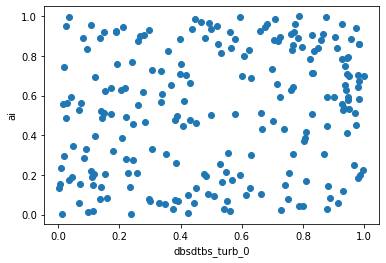

In [134]:
for i in range(10):
    for j in range(i):
        plt.scatter(inputs[inputs_to_train[i]], inputs[inputs_to_train[j]])
        
        plt.xlabel(inputs_to_train[i])
        plt.ylabel(inputs_to_train[j])
        
        plt.show()

## GP fit after selection

Selected inputs :  0      acure_sea_spray
1                 m_ci
2    acure_dry_dep_acc
3      acure_rain_frac
Name: next_var, dtype: object


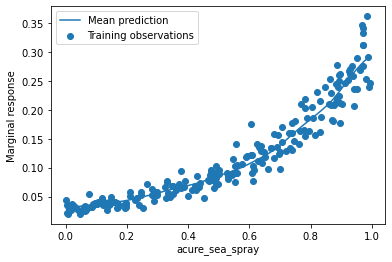

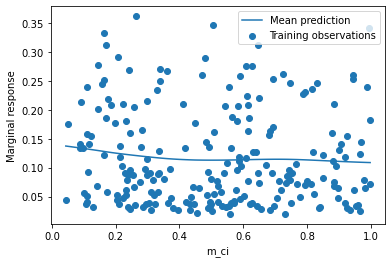

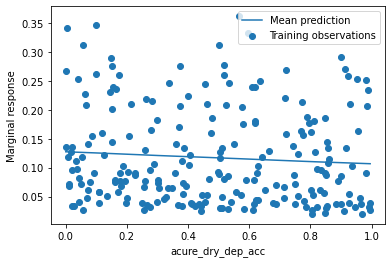

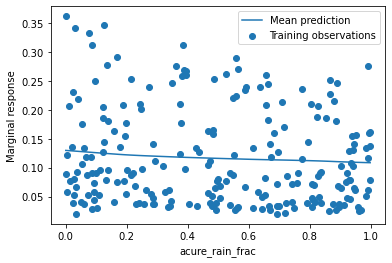

In [37]:
print('Selected inputs : ', inputs_to_train3)

for input_to_view in inputs_to_train3:
    X_test_points, predictions, mean_predictions = view_GP_curve(X3, y3, inputs_to_train3, input_to_view, 100)